In [ ]:
# MOUNTING DRIVE
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# IMPORTING LIBRARIES
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.layers import Input, Dense, Conv2D, MaxPooling2D, UpSampling2D
from tensorflow.keras.models import Model
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, auc

In [ ]:
# FUNCTION TO LOAD IMAGES FROM FOLDER
def load_images_from_folder(folder, image_size=(64, 64)):
    images = []
    for filename in os.listdir(folder):
        img = load_img(os.path.join(folder, filename), target_size=image_size, color_mode='grayscale')
        if img is not None:
            images.append(img_to_array(img))
    return np.array(images)

In [ ]:
# LOADING AND PREPROCESSING DATA
def load_data(image_size=(64, 64)):
    real_images = load_images_from_folder('/content/drive/MyDrive/project/real_and_fake_face_detection/real_and_fake_face/training_real', image_size)
    fake_images = load_images_from_folder('/content/drive/MyDrive/project/real_and_fake_face_detection/real_and_fake_face/training_fake/', image_size)

    labels = np.array([0] * len(real_images) + [1] * len(fake_images))
    data = np.vstack([real_images, fake_images])
    return train_test_split(data, labels, test_size=0.2, random_state=42)

X_train, X_test, y_train, y_test = load_data()
X_train_normalized = X_train / 255.0
X_test_normalized = X_test / 255.0

In [ ]:
# BUILDING CONVOLUTIONAL AUTOENCODER
def build_autoencoder(input_shape):
    input_img = Input(shape=input_shape)

    # ENCODER
    x = Conv2D(64, (3, 3), activation='relu', padding='same')(input_img)
    x = MaxPooling2D((2, 2), padding='same')(x)
    x = Conv2D(32, (3, 3), activation='relu', padding='same')(x)
    x = MaxPooling2D((2, 2), padding='same')(x)

    # BOTTLENECK
    x = Conv2D(16, (3, 3), activation='relu', padding='same')(x)
    x = MaxPooling2D((2, 2), padding='same')(x)

    # DECODER
    x = Conv2D(16, (3, 3), activation='relu', padding='same')(x)
    x = UpSampling2D((2, 2))(x)
    x = Conv2D(32, (3, 3), activation='relu', padding='same')(x)
    x = UpSampling2D((2, 2))(x)
    x = Conv2D(64, (3, 3), activation='relu', padding='same')(x)
    x = UpSampling2D((2, 2))(x)
    decoded = Conv2D(1, (3, 3), activation='sigmoid', padding='same')(x)

    autoencoder = Model(input_img, decoded)
    autoencoder.compile(optimizer='adam', loss='binary_crossentropy')
    return autoencoder

In [ ]:
# BUILD THE AUTOENCODER
autoencoder = build_autoencoder((64, 64, 1))

In [ ]:
# DATA AUGMENTATION SETUP
datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

In [ ]:
# FIT THE GENERATOR WITH THE TRAINING DATA
datagen.fit(X_train_normalized)

In [ ]:
# DEFINE A DATA GENERATOR
train_generator = datagen.flow(X_train_normalized, X_train_normalized, batch_size=32)

In [ ]:
# TRAIN AUTOENCODER
history = autoencoder.fit(
    train_generator,
    validation_data=(X_test_normalized, X_test_normalized),
    epochs=40
)

Epoch 1/40


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


44/44 ━━━━━━━━━━━━━━━━━━━━ 48s 903ms/step - loss: 0.6823 - val_loss: 0.6188
Epoch 2/40
44/44 ━━━━━━━━━━━━━━━━━━━━ 36s 812ms/step - loss: 0.6491 - val_loss: 0.6130
Epoch 3/40
44/44 ━━━━━━━━━━━━━━━━━━━━ 35s 798ms/step - loss: 0.6431 - val_loss: 0.6141
Epoch 4/40
44/44 ━━━━━━━━━━━━━━━━━━━━ 43s 832ms/step - loss: 0.6410 - val_loss: 0.6062
Epoch 5/40
44/44 ━━━━━━━━━━━━━━━━━━━━ 44s 897ms/step - loss: 0.6399 - val_loss: 0.6205
Epoch 6/40
44/44 ━━━━━━━━━━━━━━━━━━━━ 37s 831ms/step - loss: 0.6426 - val_loss: 0.6147
Epoch 7/40
44/44 ━━━━━━━━━━━━━━━━━━━━ 36s 804ms/step - loss: 0.6371 - val_loss: 0.6164
Epoch 8/40
44/44 ━━━━━━━━━━━━━━━━━━━━ 41s 824ms/step - loss: 0.6332 - val_loss: 0.6122
Epoch 9/40
44/44 ━━━━━━━━━━━━━━━━━━━━ 37s 837ms/step - loss: 0.6368 - val_loss: 0.6187
Epoch 10/40
44/44 ━━━━━━━━━━━━━━━━━━━━ 35s 805ms/step - loss: 0.6356 - val_loss: 0.6081
Epoch 11/40
44/44 ━━━━━━━━━━━━━━━━━━━━ 36s 814ms/step - loss: 0.6354 - val_loss: 0.6122
Epoch 12/40
44/44 ━━━━━━━━━━━━━━━━━━━━ 39s 880ms/ste

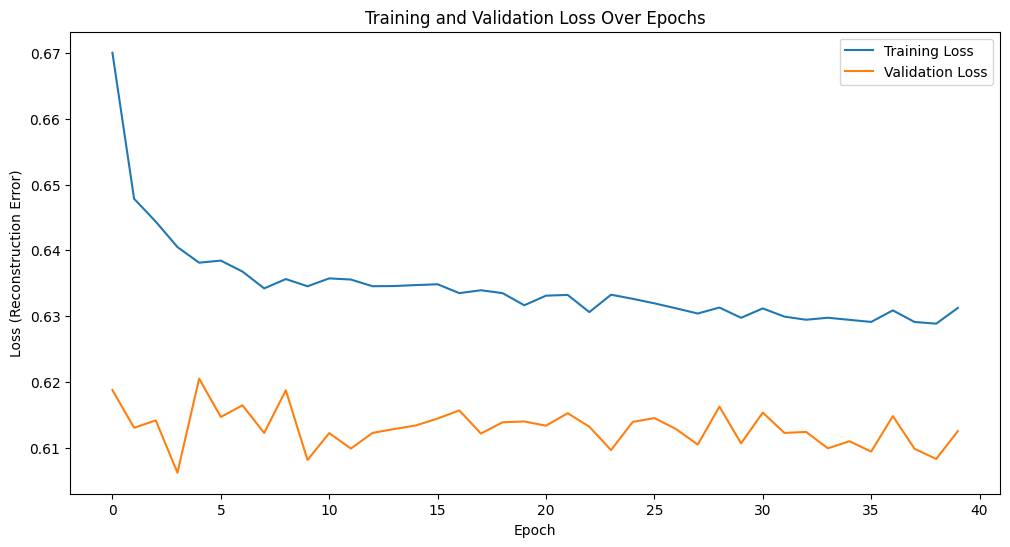

In [ ]:
# PLOT TRAINING AND VALIDATION LOSS
def plot_training_history(history):
    train_loss = history.history['loss']
    val_loss = history.history['val_loss']

    plt.figure(figsize=(12, 6))
    plt.plot(train_loss, label='Training Loss')
    plt.plot(val_loss, label='Validation Loss')
    plt.title('Training and Validation Loss Over Epochs')
    plt.xlabel('Epoch')
    plt.ylabel('Loss (Reconstruction Error)')
    plt.legend()
    plt.show()

plot_training_history(history)

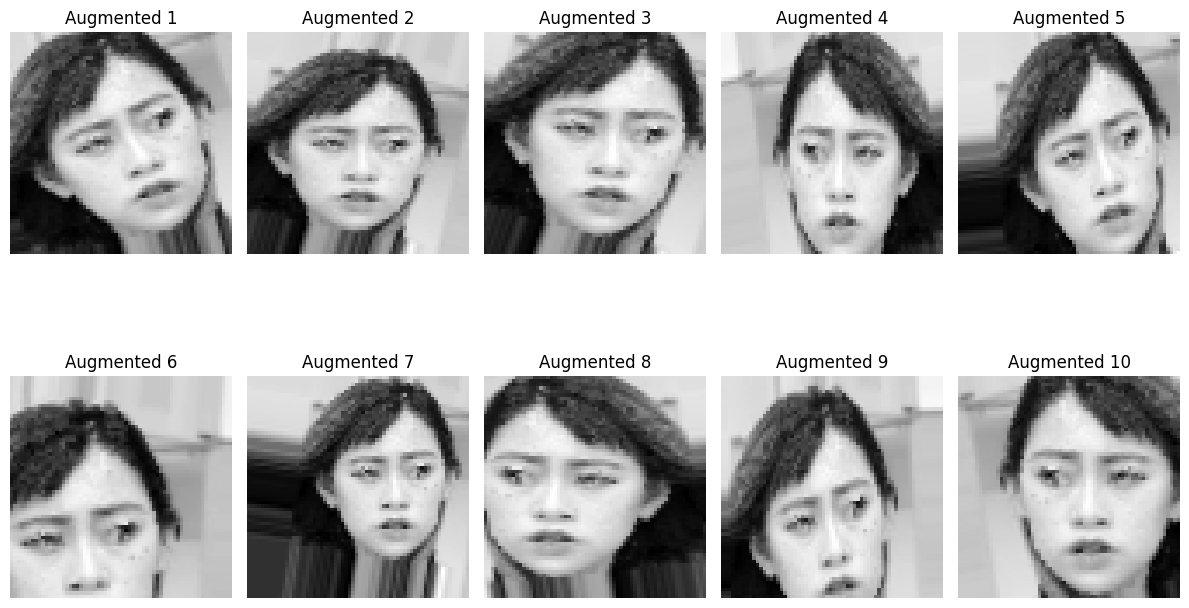

In [ ]:
# VISUALIZE AUGMENTED IMAGES
def visualize_augmented_images(datagen, image, num_images=10):
    plt.figure(figsize=(12, 8))
    for i in range(num_images):
        augmented_image = datagen.random_transform(image)
        plt.subplot(2, num_images // 2, i + 1)
        plt.imshow(augmented_image.reshape(64, 64), cmap='gray')
        plt.title(f"Augmented {i+1}")
        plt.axis('off')
    plt.tight_layout()
    plt.show()

visualize_augmented_images(datagen, X_train_normalized[0])

In [ ]:
# FEATURE EXTRACTION FROM AUTOENCODER
def extract_features(autoencoder, data):
    encoder = Model(autoencoder.input, autoencoder.layers[-6].output)
    features = encoder.predict(data)
    return features

X_train_features = extract_features(autoencoder, X_train_normalized)
X_test_features = extract_features(autoencoder, X_test_normalized)

44/44 ━━━━━━━━━━━━━━━━━━━━ 5s 108ms/step
11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 85ms/step


In [ ]:
# KNN CLASSIFIER
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_features.reshape(len(X_train_features), -1), y_train)

KNeighborsClassifier()

In [ ]:
# PREDICT AND EVALUATE KNN
y_pred = knn.predict(X_test_features.reshape(len(X_test_features), -1))

In [ ]:
from imblearn.over_sampling import SMOTE

# Flatten the image data
n_samples, height, width, channels = X_train_features.shape
X_train_flat = X_train_features.reshape(n_samples, height * width * channels)

# Apply SMOTE to the training data
smote = SMOTE(random_state=42)
X_train_resampled_flat, y_train_resampled = smote.fit_resample(X_train_flat, y_train)

# Optional: Reshape back to the original image dimensions if needed
X_train_resampled = X_train_resampled_flat.reshape(-1, height, width, channels)

print("Before SMOTE:", X_train_features.shape)
print("After SMOTE:", X_train_resampled.shape)


Before SMOTE: (1406, 16, 16, 16)
After SMOTE: (1720, 16, 16, 16)


In [ ]:
# PRINT EVALUATION METRICS
print("Accuracy: ", accuracy_score(y_test, y_pred))
print("Confusion Matrix: \n", confusion_matrix(y_test, y_pred))
print("Classification Report: \n", classification_report(y_test, y_pred))

Accuracy:  0.5113636363636364
Confusion Matrix: 
 [[133  88]
 [ 84  47]]
Classification Report: 
               precision    recall  f1-score   support

           0       0.61      0.60      0.61       221
           1       0.35      0.36      0.35       131

    accuracy                           0.51       352
   macro avg       0.48      0.48      0.48       352
weighted avg       0.51      0.51      0.51       352



In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import accuracy_score

# Flatten the training and test features
X_train_resampled_flat = X_train_resampled.reshape(X_train_resampled.shape[0], -1)
X_test_flat = X_test_features.reshape(X_test_features.shape[0], -1)

# Set up the parameter distribution for RandomizedSearchCV
param_dist = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'class_weight': ['balanced']
}

# Create a randomized search
random_search = RandomizedSearchCV(RandomForestClassifier(), param_distributions=param_dist, n_iter=10, cv=5, random_state=42)
random_search.fit(X_train_resampled_flat, y_train_resampled)

# Get the best estimator and predict
best_rf = random_search.best_estimator_
y_pred_best_rf = best_rf.predict(X_test_flat)

# Print the accuracy and best parameters
print("Best Random Forest Accuracy:", accuracy_score(y_test, y_pred_best_rf))
print("Best Parameters:", random_search.best_params_)


Best Random Forest Accuracy: 0.6079545454545454
Best Parameters: {'n_estimators': 100, 'min_samples_split': 5, 'max_depth': 30, 'class_weight': 'balanced'}


Confusion Matrix:
 [[177  44]
 [ 94  37]]

Classification Report:
               precision    recall  f1-score   support

           0       0.65      0.80      0.72       221
           1       0.46      0.28      0.35       131

    accuracy                           0.61       352
   macro avg       0.55      0.54      0.53       352
weighted avg       0.58      0.61      0.58       352



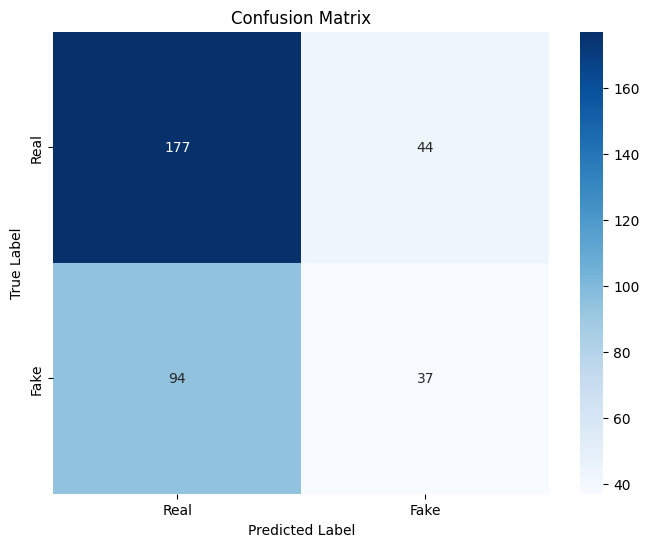

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns

# Generate confusion matrix and classification report
conf_matrix = confusion_matrix(y_test, y_pred_best_rf)
class_report = classification_report(y_test, y_pred_best_rf)

print("Confusion Matrix:\n", conf_matrix)
print("\nClassification Report:\n", class_report)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Real', 'Fake'], yticklabels=['Real', 'Fake'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()


In [ ]:
# Additional imports
from sklearn.model_selection import cross_val_score
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import VotingClassifier, RandomForestClassifier
from sklearn.svm import SVC
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [ ]:
# Create an MLP model with more iterations
mlp_model = MLPClassifier(max_iter=500)

In [ ]:
# Create the ensemble model
ensemble_model = VotingClassifier(estimators=[
    ('rf', RandomForestClassifier()),
    ('svm', SVC(probability=True)),
    ('nn', mlp_model)
], voting='soft')

In [ ]:
# Fit the ensemble model
ensemble_model.fit(X_train_resampled_flat, y_train_resampled)

VotingClassifier(estimators=[('rf', RandomForestClassifier()),
                             ('svm', SVC(probability=True)),
                             ('nn', MLPClassifier(max_iter=500))],
                 voting='soft')

In [ ]:
# Predict using the ensemble model
y_pred_ensemble = ensemble_model.predict(X_test_flat)

In [ ]:
# Evaluate performance
print("Ensemble Model Accuracy:", accuracy_score(y_test, y_pred_ensemble))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_ensemble))
print("Classification Report:\n", classification_report(y_test, y_pred_ensemble))

Ensemble Model Accuracy: 0.5909090909090909
Confusion Matrix:
 [[148  73]
 [ 71  60]]
Classification Report:
               precision    recall  f1-score   support

           0       0.68      0.67      0.67       221
           1       0.45      0.46      0.45       131

    accuracy                           0.59       352
   macro avg       0.56      0.56      0.56       352
weighted avg       0.59      0.59      0.59       352



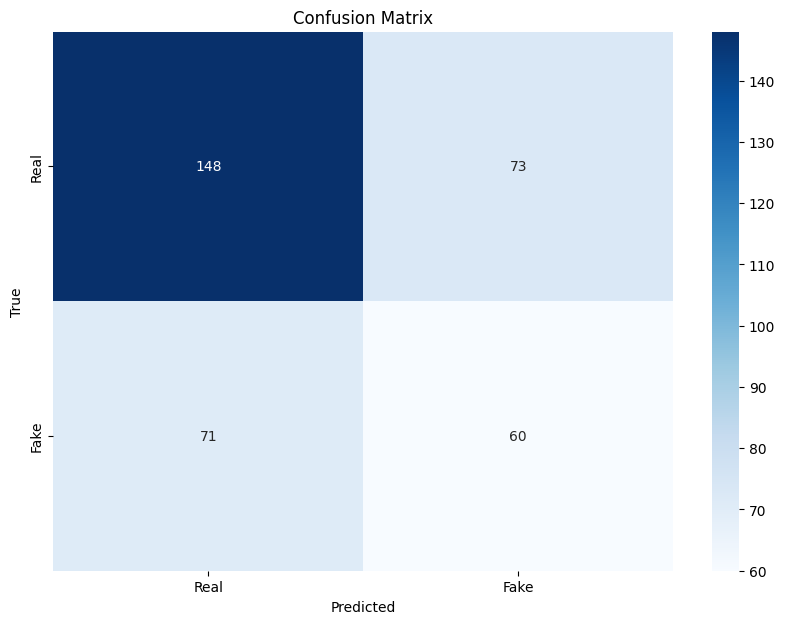

In [ ]:
# Visualize confusion matrix
confusion_mtx = confusion_matrix(y_test, y_pred_ensemble)
plt.figure(figsize=(10, 7))
sns.heatmap(confusion_mtx, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Real', 'Fake'], yticklabels=['Real', 'Fake'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
# Cross-validate the ensemble model
scores = cross_val_score(ensemble_model, X_train_resampled_flat, y_train_resampled, cv=5)
print("Cross-Validation Scores:", scores)
print("Mean CV Accuracy:", scores.mean())

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


Cross-Validation Scores: [0.70639535 0.65988372 0.7005814  0.74418605 0.84302326]
Mean CV Accuracy: 0.7308139534883721


In [ ]:
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import cross_val_score, KFold

# Adjusting the MLP parameters to prevent convergence issues
mlp = MLPClassifier(max_iter=1000, random_state=42)

# Include the MLP in your VotingClassifier or train separately
ensemble_model = VotingClassifier(estimators=[
    ('knn', knn),
    ('mlp', mlp),  # Add MLP to the ensemble if needed
    # Add other classifiers here
], voting='soft')

# Define the number of folds for cross-validation
cv = KFold(n_splits=5, shuffle=True, random_state=42) # Define cv with KFold

# Perform cross-validation using the resampled training data
accuracies = cross_val_score(ensemble_model, X_train_resampled_flat, y_train_resampled, cv=cv, scoring='accuracy')
# Changed X and y to X_train_resampled_flat and y_train_resampled respectively
print(f'Updated Cross-Validation Accuracy: {accuracies.mean():.2f} (+/- {accuracies.std():.2f})')

Updated Cross-Validation Accuracy: 0.66 (+/- 0.04)


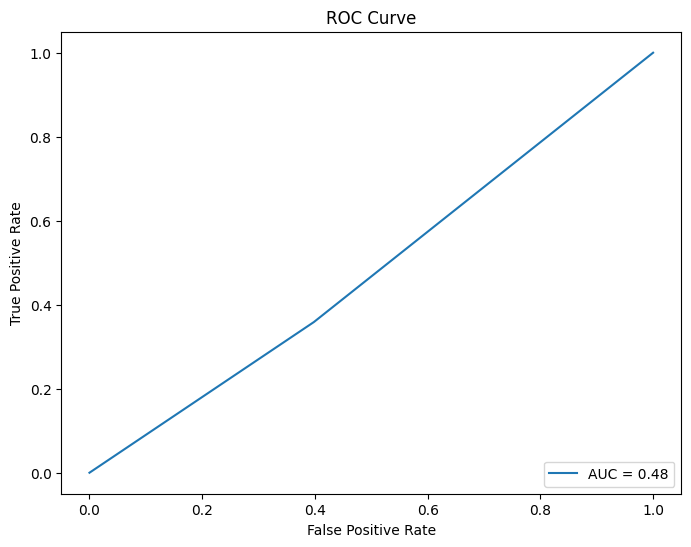

In [ ]:
# ROC CURVE
fpr, tpr, _ = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'AUC = {roc_auc:.2f}')
plt.title('ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.show()